# Chapter4　形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

31. 動詞
動詞の表層形をすべて抽出せよ．

32. 動詞の原形
動詞の原形をすべて抽出せよ．

33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [1]:
# 参考：https://taku910.github.io/mecab/#parse
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
#   ^1    ^2     ^3                                       ^8 
# suface  pos    pos1                                    base

In [6]:
function parse_mecab_res(fname)
    input_data = []
    open(fname) do input
        while !eof(input)
            sentence = replace(readuntil(input, "EOS\n"), r"\n$"s => s"")
            if sentence == ""
                continue
            end
            elem_list = split(sentence, "\n")
            s_dict_arr = []
            for e in elem_list
                res = split(e, r"\t|,")
                tmp = Dict("surface"=>res[1], "base"=>res[8], "pos"=>res[2], "pos1"=>res[3])
                push!(s_dict_arr, tmp)
            end
            push!(input_data, s_dict_arr)
        end
    end
    
    return input_data
end

parse_mecab_res (generic function with 1 method)

In [7]:
neko_data = parse_mecab_res("./neko.txt.mecab")

9210-element Array{Any,1}:
 Any[Dict{String,SubString{String}}("base" => "一","surface" => "一","pos" => "名詞","pos1" => "数")]
 Any[Dict{String,SubString{String}}("base" => "　","surface" => "　","pos" => "記号","pos1" => "空白"), Dict{String,SubString{String}}("base" => "吾輩","surface" => "吾輩","pos" => "名詞","pos1" => "代名詞"), Dict{String,SubString{String}}("base" => "は","surface" => "は","pos" => "助詞","pos1" => "係助詞"), Dict{String,SubString{String}}("base" => "猫","surface" => "猫","pos" => "名詞","pos1" => "一般"), Dict{String,SubString{String}}("base" => "だ","surface" => "で","pos" => "助動詞","pos1" => "*"), Dict{String,SubString{String}}("base" => "ある","surface" => "ある","pos" => "助動詞","pos1" => "*"), Dict{String,SubString{String}}("base" => "。","surface" => "。","pos" => "記号","pos1" => "句点")]
 Any[Dict{String,SubString{String}}("base" => "名前","surface" => "名前","pos" => "名詞","pos1" => "一般"), Dict{String,SubString{String}}("base" => "は","surface" => "は","pos" => "助詞","pos1" => "係助詞"), Dict{String,SubStrin

In [8]:
function q31()
    verbs = []
    for s in neko_data
         for e in s
            if e["pos"] == "動詞"
                push!(verbs, e["surface"])
            end
        end
    end
    return verbs
end

q31 (generic function with 1 method)

In [9]:
ret = q31()
println(length(ret))
print(ret)

28906
Any["生れ", "つか", "し", "泣い", "し", "いる", "始め", "見", "聞く", "捕え", "煮", "食う", "思わ", "載せ", "られ", "持ち上げ", "られ", "し", "あっ", "落ちつい", "見", "見", "思っ", "残っ", "いる", "さ", "れ", "し", "逢っ", "出会わ", "し", "のみ", "なら", "し", "いる", "吹く", "せ", "弱っ", "飲む", "知っ", "坐っ", "おっ", "する", "し", "始め", "動く", "動く", "分ら", "廻る", "なる", "助から", "思っ", "いる", "さり", "し", "出", "し", "いる", "考え出そ", "分ら", "付い", "見る", "い", "おっ", "見え", "隠し", "しまっ", "違っ", "明い", "い", "られ", "這い出し", "見る", "棄て", "られ", "這い出す", "ある", "坐っ", "し", "考え", "見", "出", "し", "泣い", "来", "くれる", "考え付い", "やっ", "見", "来", "渡っ", "かかる", "減っ", "来", "泣き", "出", "ある", "ある", "し", "そろ", "廻り", "始め", "し", "這っ", "行く", "出", "這入っ", "なる", "思っ", "崩れ", "もぐり込ん", "破れ", "い", "し", "知れ", "云っ", "至る", "する", "なっ", "いる", "忍び込ん", "分ら", "なる", "減る", "降っ", "来る", "出来", "なっ", "あるい", "行く", "考える", "這入っ", "おっ", "見る", "し", "逢っ", "見る", "つかん", "抛り出し", "思っ", "ねぶっ", "任せ", "い", "出来", "見", "這い", "上っ", "投げ出さ", "れ", "投げ出さ", "れ", "這い", "上り", "這い", "上っ", "投げ出さ", "れ", "繰り返し", "し", "いる", "云う", "なっ", "し", "やっ", "下り", "つま

In [10]:
function q32()
    verbs_base = []
    for s in neko_data
        for e in s
            if e["pos"] == "動詞"
                push!(verbs_base, e["base"])
            end
        end
    end
    return verbs_base
end

q32 (generic function with 1 method)

In [11]:
ret = q32()
println(length(ret))
print(ret)

28906
Any["生れる", "つく", "する", "泣く", "する", "いる", "始める", "見る", "聞く", "捕える", "煮る", "食う", "思う", "載せる", "られる", "持ち上げる", "られる", "する", "ある", "落ちつく", "見る", "見る", "思う", "残る", "いる", "する", "れる", "する", "逢う", "出会う", "する", "のむ", "なる", "する", "いる", "吹く", "する", "弱る", "飲む", "知る", "坐る", "おる", "する", "する", "始める", "動く", "動く", "分る", "廻る", "なる", "助かる", "思う", "いる", "さる", "する", "出る", "する", "いる", "考え出す", "分る", "付く", "見る", "いる", "おる", "見える", "隠す", "しまう", "違う", "明く", "いる", "られる", "這い出す", "見る", "棄てる", "られる", "這い出す", "ある", "坐る", "する", "考える", "見る", "出る", "する", "泣く", "来る", "くれる", "考え付く", "やる", "見る", "来る", "渡る", "かかる", "減る", "来る", "泣く", "出る", "ある", "ある", "する", "そる", "廻る", "始める", "する", "這う", "行く", "出る", "這入る", "なる", "思う", "崩れる", "もぐり込む", "破れる", "いる", "する", "知れる", "云う", "至る", "する", "なる", "いる", "忍び込む", "分る", "なる", "減る", "降る", "来る", "出来る", "なる", "あるく", "行く", "考える", "這入る", "おる", "見る", "する", "逢う", "見る", "つかむ", "抛り出す", "思う", "ねぶる", "任せる", "いる", "出来る", "見る", "這う", "上る", "投げ出す", "れる", "投げ出す", "れる", "這う", "上る", "這う", "上る", "投げ出す"

In [12]:
function q33()
    nouns_sa_var = []
    for s in neko_data
        for e in s
            if e["pos"] == "名詞" && e["pos1"] == "サ変接続"
                push!(nouns_sa_var, e["base"])
            end
        end
    end
    return nouns_sa_var
end

q33 (generic function with 1 method)

In [13]:
ret = q33()
println(length(ret))
print(ret)

5209
Any["見当", "記憶", "話", "装飾", "突起", "運転", "記憶", "分別", "決心", "我慢", "餓死", "訪問", "始末", "猶予", "遭遇", "我慢", "記憶", "返報", "勉強", "勉強", "昼寝", "珍重", "昼寝", "経験", "供", "供", "供", "供", "*", "*", "同居", "観察", "断言", "同衾", "供", "迫害", "尊敬", "生活", "剿滅", "議論", "所有", "憤慨", "観念", "御馳走", "掠奪", "代言", "我儘", "我儘", "失敗", "話", "投書", "関", "決心", "昼寝", "鑑定", "話", "述懐", "想像", "写生", "感心", "昼寝", "失笑", "揶揄", "写生", "欠伸", "自白", "彩色", "写生", "判然", "心中", "感服", "小便", "猶予", "失敬", "欠伸", "予定", "失望", "漫罵", "小便", "増長", "増長", "我儘", "我慢", "報道", "供", "昼寝", "退屈", "加減", "一睡", "運動", "嘆賞", "佇立", "記憶", "珍重", "身動き", "挨拶", "鼓動", "軽蔑", "察", "肥満", "御馳走", "乱暴", "教育", "交際", "同盟", "敬遠", "軽侮", "問答", "御馳走", "邂逅", "邂逅", "相当", "雑談", "自慢", "質問", "発達", "比較", "覚悟", "自慢", "感心", "謹聴", "呼吸", "弁護", "思案", "吶喊", "掃除", "感心", "喝采", "質問", "反対", "呈出", "大息", "*", "加減", "決心", "御馳走", "御馳走", "要心", "放蕩", "放蕩", "放蕩", "放蕩", "放蕩", "放蕩", "自任", "放蕩", "卒業", "関", "料理", "首肯", "批評", "関", "訪問", "忠告", "写生", "写生", "変化", "写生", "主張", "発達", "感心", "感服", "捏造", "話", "喜悦", "対話", "想像", 

In [14]:
function q34()
    nouns_の = []
    for s in neko_data
        for i in 2:length(s) - 1
            if s[i-1]["pos"] == "名詞" && s[i]["base"] == "の" && s[i+1]["pos"] == "名詞"
                push!(nouns_の, s[i-1]["surface"] * s[i]["surface"] * s[i+1]["surface"])
            end
        end
    end
    return nouns_の
end

q34 (generic function with 1 method)

In [15]:
ret = q34()
println(length(ret))
println(ret)

6044
Any["彼の掌", "掌の上", "書生の顔", "はずの顔", "顔の真中", "穴の中", "書生の掌", "掌の裏", "何の事", "肝心の母親", "藁の上", "笹原の中", "池の前", "池の上", "一樹の蔭", "垣根の穴", "隣家の三", "時の通路", "一刻の猶予", "家の内", "彼の書生", "以外の人間", "前の書生", "おさんの隙", "おさんの三", "胸の痞", "家の主人", "主人の方", "鼻の下", "吾輩の顔", "自分の住", "吾輩の主人", "家のもの", "うちのもの", "彼の書斎", "本の上", "皮膚の色", "本の上", "彼の毎夜", "以外のもの", "主人の傍", "彼の膝", "膝の上", "経験の上", "飯櫃の上", "炬燵の上", "ここのうち", "供の寝床", "彼等の中間", "供の一", "例の神経", "性の主人", "次の部屋", "自分の勝手", "吾輩の方", "台所の板の間", "吾輩の尊敬", "向の白", "玉のよう", "そこの家", "家の書生", "裏の池", "親子の愛", "もっともの議論", "刺の頭", "鰡の臍", "彼等のため", "軍人の家", "代言の主人", "教師の家", "猫の時節", "吾輩の家", "家の主人", "だらけの英文", "胃弱の癖", "後架の中", "平の宗", "月の月給", "当分の間", "下のよう", "今更のよう", "主人の述懐", "彼の友", "金縁の眼鏡", "主人の顔", "内の想像", "訳のもの", "利の大家", "金縁の裏", "吾輩の後ろ", "彼の友", "吾輩の輪廓", "顔のあたり", "上乗の出来", "顔の造作", "他の猫", "不器量の吾輩", "吾輩の主人", "斯産の猫", "斑入りの皮膚", "主人の彩色", "一種の色", "身内の筋肉", "主人の予定", "座敷の中", "悪口の言いよう", "人の気", "彼の背中", "こっちの便利", "自己の力量", "人間の不徳", "吾輩の家", "家の裏", "浩然の気", "小春の穏", "日の二", "茶の木の根", "西側の杉", "垣のそば", "他の庭", "純粋の黒", "彼の皮膚",

In [16]:
function q35()
    comp_nouns = []
    for s in neko_data
        comp_noun = []
        for i in 1:length(s)
            if s[i]["pos"] == "名詞"
                push!(comp_noun, s[i]["surface"])
                if i == length(s)
                    push!(comp_nouns, join(comp_noun))
                end
            elseif s[i]["pos"] != "名詞"
                if length(comp_noun) > 1
                    push!(comp_nouns, join(comp_noun))
                end
                comp_noun = []
            end
        end
    end
    return comp_nouns
end

q35 (generic function with 1 method)

In [17]:
res = q35()
println(length(res))
println(res)

7357
Any["一", "人間中", "一番獰悪", "時妙", "一毛", "その後猫", "一度", "ぷうぷうと煙", "邸内", "三毛", "書生以外", "四五遍", "この間おさん", "三馬", "御台所", "まま奥", "住家", "終日書斎", "勉強家", "勉強家", "勤勉家", "二三ページ", "主人以外", "限り吾輩", "朝主人", "一番心持", "二人", "一つ床", "一人", "最後大変", "——猫", "神経胃弱性", "物指", "尻ぺたをひどく", "言語同断", "家内総がかり", "筋向", "白君", "度毎", "白君", "先日玉", "四疋", "三日目", "四疋", "白君", "我等猫族", "家族的生活", "三毛君", "所有権", "我々同族間", "目刺", "一番先", "彼等人間", "我等", "吾人", "白君", "三毛君", "間違いだらけ", "後架先生", "宗盛", "宗盛", "月給日", "水彩絵具", "毎日毎日書斎", "人の", "自ら筆", "眼鏡越", "一室内", "以太利", "大家アンドレア・デル・サルト", "露華", "寒鴉", "これ一幅", "活画", "翌日吾輩", "一分", "辛棒", "今吾輩", "今吾輩", "波斯産", "上不思議", "盲猫", "心中ひそか", "いくらアンドレア・デル・サルト", "一分", "あと大", "壊わし", "馬鹿野郎", "馬鹿野郎", "辛棒", "馬鹿野郎呼わり", "平生吾輩", "馬鹿野郎", "みんな増長", "先どこ", "数倍", "十坪", "腹加減", "穏かな日", "二時頃", "昼飯後", "運動かたがた", "一本一本", "杉垣", "前後不覚", "庭内", "忍び入り", "黒猫", "柔毛", "出ずるよう", "猫中", "杉垣", "二三枚", "ぐべき力", "険呑", "時吾輩", "言葉付", "誰だい", "乱暴猫", "同盟敬遠主義", "一体車屋", "大分強そう", "おれなんざ", "茶畠", "箆棒め", "あらら", "その後吾輩", "車屋相当", "不徳事件", "日例", "茶畠", "何匹", "近付", "事彼", "手

In [18]:
function q36()
    counter = Dict()
    for w in map(d->d["surface"], collect(Iterators.flatten(neko_data)))
        counter[w] = get(counter, w, 0) + 1
    end
    return counter
end

q36 (generic function with 1 method)

In [19]:
res = q36()
sort!(collect(res), by = x -> x[2], rev=true)

13584-element Array{Pair{Any,Any},1}:
      "の" => 9194
      "。" => 7486
      "て" => 6868
      "、" => 6772
      "は" => 6420
      "に" => 6243
      "を" => 6071
      "と" => 5508
      "が" => 5337
      "た" => 3988
      "で" => 3806
      "「" => 3231
      "」" => 3225
          ⋮
     "口気" => 1
    "降りよ" => 1
     "助勢" => 1
     "再考" => 1
     "琴線" => 1
     "長大" => 1
     "一片" => 1
     "宿命" => 1
     "草々" => 1
 "浴びせかける" => 1
     "下部" => 1
     "奮闘" => 1

In [20]:
using Pkg; Pkg.add("Gaston"); Pkg.add("Gnuplot")

   Updating registry at `~/.julia/registries/General`
tar: Failed to set default locale
tar: Failed to set default locale
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [21]:
using Gaston, Gnuplot

┌ Info:   Gnuplot version: 5.4.0
└ @ Gnuplot /Users/takanorifukuyama/.julia/packages/Gnuplot/GkEY3/src/Gnuplot.jl:111


gnuplot本体をインストール＆パスをとおさないと以下plotが表示されない  
macなら`brew install gnuplot`でインストール可能

In [23]:
function q37(freq)
    sorted = sort(freq, by = x -> x.second, rev=true)[1:10]
    x_data = [p.first for p in sorted]
    y_data = [p.second for p in sorted]
    bar(range(1, length=10), y_data, )
end

q37 (generic function with 1 method)

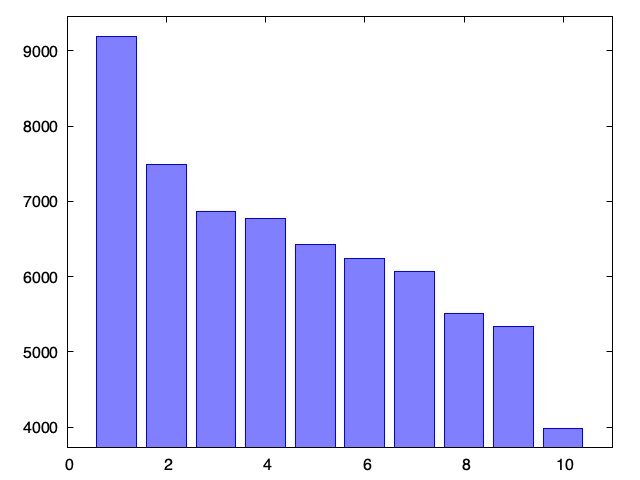

In [24]:
freq_data = collect(q36())
q37(freq_data)

In [25]:
function q38(data)
    # 頻度ごとに軽度の分布をカウントする
    freq_cnt = Dict()
    freq_val = [d.second for d in data]
    for v in freq_val
        freq_cnt[v] = get(freq_cnt, v, 0) + 1
    end
    # sort
    sorted = sort(collect(freq_cnt), by = x -> x.first)[1:20]
    val_data = [p.first for p in sorted]
    cnt_data = [p.second for p in sorted]
    bar(val_data, cnt_data)
end

q38 (generic function with 1 method)

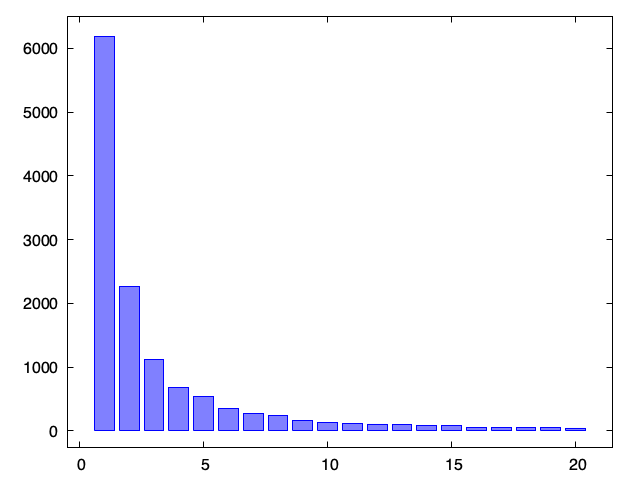

In [26]:
q38(freq_data)

In [ ]:
function q39(data)
    freq_cnt = Dict()
    freq_val = [d.second for d in data]
    for v in freq_val
        freq_cnt[v] = get(freq_cnt, v, 0) + 1
    end
    
    sorted = sort(collect(freq_cnt), by = x -> x.first)
    val_data = [p.first for p in sorted]
    cnt_data = [p.second for p in sorted]
    scatter(val_data, cnt_data, axis="loglog", plotstyle="points", pointtype="fcircle", pointsize= )